In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
# Import essential libraries
import numpy as np # for numeric calculation
import pandas as pd # for data manupulation or analysis
import matplotlib.pyplot as plt # for data Visualization
import seaborn as sns # for data Visualization
from sklearn.model_selection import train_test_split # for splitting the data for training and testing 
from sklearn.preprocessing import StandardScaler # for converting different units and magnitude data in one unit
from sklearn.metrics import classification_report # for classification report of the ML Model
from sklearn.metrics import accuracy_score # to find the accurate score of ML model
from sklearn.metrics import confusion_matrix # to find the ML model is giving best output
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbour Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.neural_network import MLPClassifier # Multi-Layer Perception Classifier
from sklearn.model_selection import cross_val_score # to find the ML model is overfitted, underfitted or generalize
import pickle # to save the machine learning model

C:\Users\Dilip Sai\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Cancer_dataset = pd.read_csv("breast-cancer.csv")

In [4]:
Cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
print(type(Cancer_dataset))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(Cancer_dataset.keys())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
Cancer_dataset.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [8]:
Cancer_dataset.tail(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
print(Cancer_dataset.diagnosis) #target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [10]:
Target_Variables = Cancer_dataset.diagnosis #target variables

In [11]:
Target_Variables.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
print(Target_Variables)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [13]:
print(Target_Variables.unique()) #Target Values

['M' 'B']


In [14]:
t = []
for i in Target_Variables:
    if(i == "M"):
        t.append(0)
    else:
        t.append(1)

In [15]:
Target = t
print(Target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [16]:
print(Cancer_dataset.T.describe)

<bound method NDFrame.describe of                               0         1         2         3         4    \
id                         842302    842517  84300903  84348301  84358402   
diagnosis                       M         M         M         M         M   
radius_mean                 17.99     20.57     19.69     11.42     20.29   
texture_mean                10.38     17.77     21.25     20.38     14.34   
perimeter_mean              122.8     132.9     130.0     77.58     135.1   
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0   
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003   
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328   
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198   
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043   
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809   
fractal_dimension_mean    0.07871   0.0566

In [17]:
Feature_Variables = Cancer_dataset.drop(['id', 'diagnosis'], axis = 1)

In [18]:
print(Feature_Variables)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [19]:
Cancer_df = pd.DataFrame(np.c_[Feature_Variables, Target], columns = np.append(Feature_Variables.columns, ['target']))

In [20]:
print(Cancer_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [21]:
print(Cancer_df.keys())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')


In [22]:
Cancer_df.head(7)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0


In [23]:
Cancer_df.tail(7)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,0.0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [24]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [25]:
print(Cancer_df.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64


In [26]:
Cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [27]:
 #DATA VISUALIZATION
 #Pairplot of cancer dataframe
#sns.set()
#plt.figure(figsize = (12,12))
#sns.pairplot(Cancer_df, hue = "target")
#plt.show()

<Figure size 864x864 with 0 Axes>

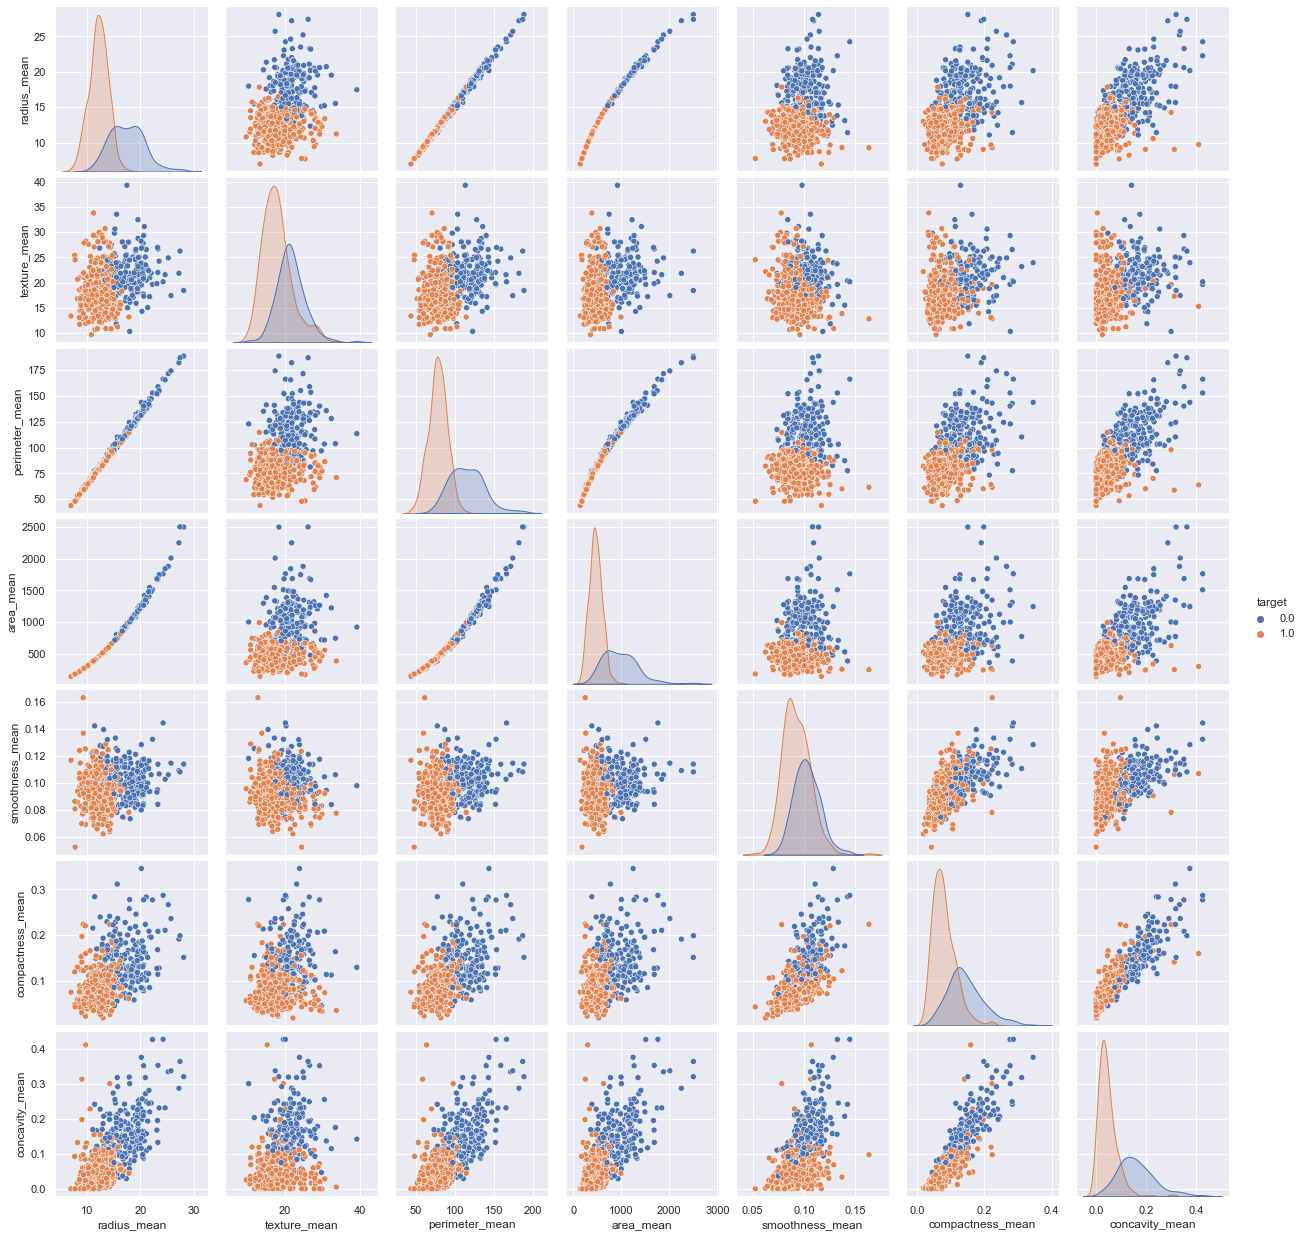

In [28]:
# pairplot of sample feature
sns.set()
plt.figure(figsize = (12,12))
sns.pairplot(Cancer_df, hue = 'target',vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean'])
plt.show()

C:\Users\Dilip Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


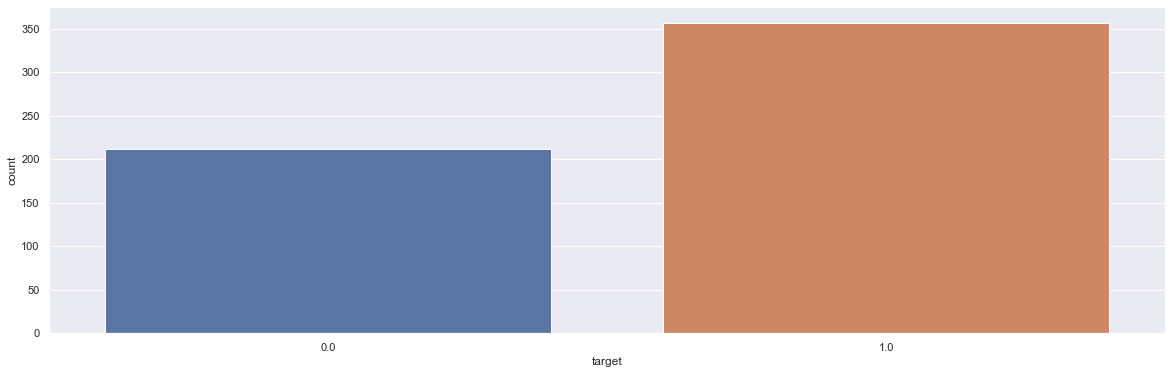

In [29]:
# Counterplot
#count the target
sns.set()
plt.figure(figsize = (20,6))
sns.countplot(Cancer_df['target'])
plt.show()

C:\Users\Dilip Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


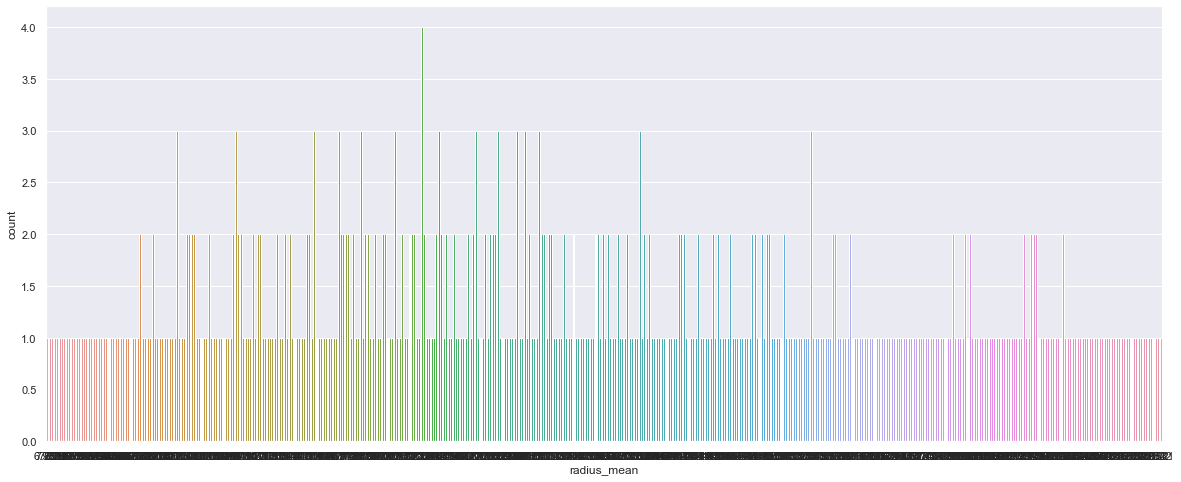

In [30]:
#counterplot of the feature mean radius
sns.set()
plt.figure(figsize = (20,8))
sns.countplot(Cancer_df['radius_mean'])
plt.show()

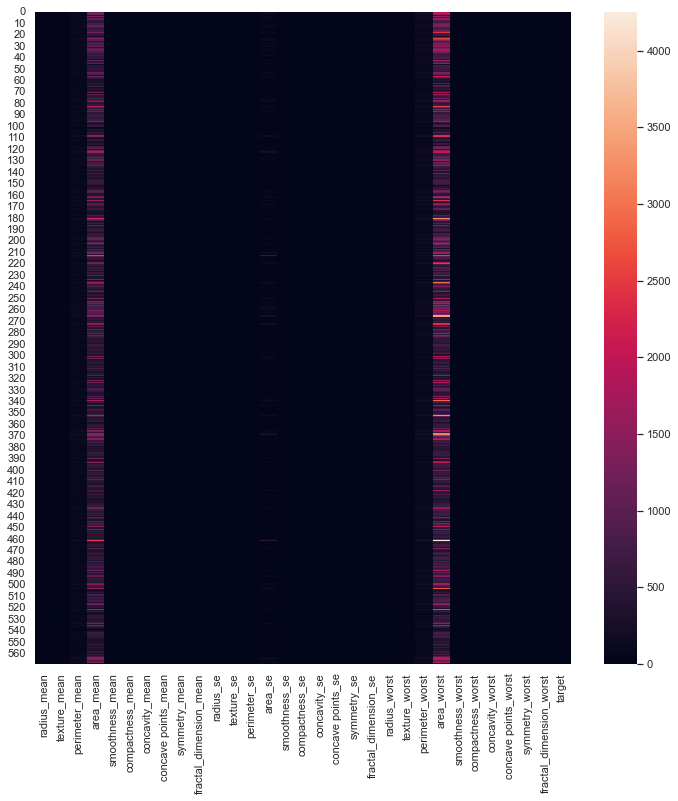

In [31]:
# Heatmap of Dataframe
sns.set()
plt.figure(figsize = (12,12))
sns.heatmap(Cancer_df)
plt.show()

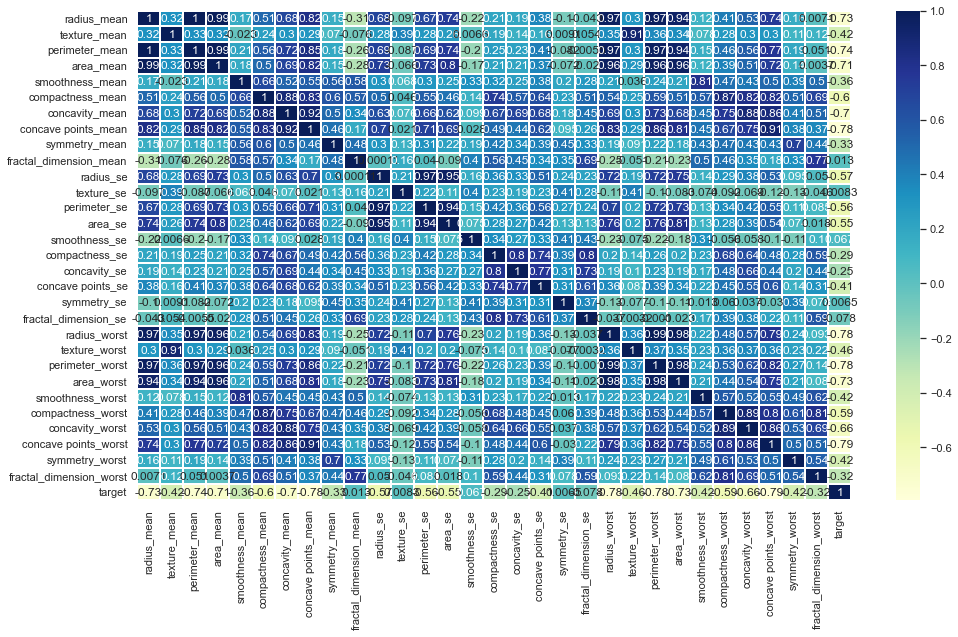

In [32]:
# heatmap of correlation matrix
sns.set()
plt.figure(figsize = (16,9))
corel = Cancer_df.corr()
sns.heatmap(corel, annot = True, xticklabels = corel.columns, yticklabels = corel.columns, cmap = 'YlGnBu', linewidth = 2)
plt.show()

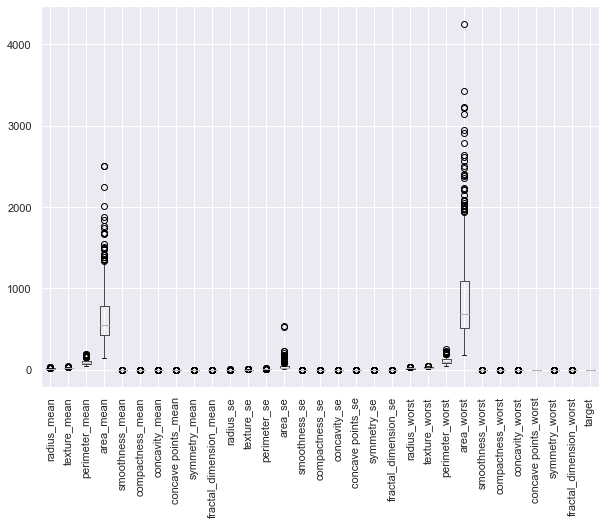

In [33]:
# Boxplot for the cancer dataframe
sns.set()
plt.figure(figsize = (10,7))
Cancer_df.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [34]:
#Correlation barplot
# create second dataframe by dropping target
Cancer_df2 = Cancer_df.drop(['target'], axis = 1)
print(Cancer_df2.shape)

(569, 30)


In [35]:
# Data preprocessing
#split the datafraame in train and test

#input variable
X = Cancer_df2
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
#output variable
y = Cancer_df['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [37]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [38]:
print(X_train.shape)

(455, 30)


In [39]:
print(X_test.shape)

(114, 30)


In [40]:
print(Cancer_df2.shape)

(569, 30)


In [41]:
#FEATURE SCALING
#loading Standard scaler function
scaler = StandardScaler()

In [42]:
#fitting and tranforming the data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [43]:
print(X_train_sc)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [44]:
print(X_test_sc)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [45]:
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
560        14.05         27.15           91.38      600.4          0.09929   
428        11.13         16.62           70.47      381.1          0.08151   
198        19.18         22.49          127.50     1148.0          0.08523   
203        13.81         23.75           91.56      597.8          0.13230   
41         10.95         21.35           71.90      371.1          0.12270   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     compactness_mean  concavity_mean  concave points_mean  sym

In [46]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.13940,0.13640,0.15590,0.10150,0.2160,0.07253
291,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
340,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.023770,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.115500,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.31010,0.43990,0.22800,0.2268,0.07425
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.091700,0.1995,0.06330,...,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [47]:
#Building machine learning model to detect the breast cancer

In [48]:
# SUPPORT VECTOR CLASSIFIER
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("Accuracy score of Data with Support Vector Classifier - ", accuracy_score(y_test,y_pred_svc))

Accuracy score of Data with Support Vector Classifier -  0.9035087719298246


In [49]:
# Train with Standard Scaled Data
svc_classifier.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with Support Vector Classifier - ", accuracy_score(y_test, y_pred_svc_sc))

Accuracy score of Standard Scaled Data with Support Vector Classifier -  0.9736842105263158


In [50]:
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression(random_state = 40, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Accuracy score of Data with Logistic Regression Classifier - ", accuracy_score(y_test, y_pred_lr))

Accuracy score of Data with Logistic Regression Classifier -  0.9210526315789473


C:\Users\Dilip Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Train with Standard scaled Data
lr_classifier.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
print("Predicted values are:")
print(y_pred_lr_sc)
print()
print("Accuracy score of Standard Scaled Data with Logistic Regression Classifier - ", accuracy_score(y_test, y_pred_lr_sc))
print()
print("Actual Test values are:")
print(list(y_test))

Predicted values are:
[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]

Accuracy score of Standard Scaled Data with Logistic Regression Classifier -  0.9736842105263158

Actual Test values are:
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0

In [52]:
# K-Nearest Neighbour Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print("Accuracy score of Data with K-Nearest Neighbour Classifier - ", accuracy_score(y_test, y_pred_knn))

Accuracy score of Data with K-Nearest Neighbour Classifier -  0.9035087719298246


In [53]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with K-Nearest Neighbour Classifier - ", accuracy_score(y_test, y_pred_knn_sc))

Accuracy score of Standard Scaled Data with K-Nearest Neighbour Classifier -  0.6052631578947368


In [54]:
# NAIVE BAYES CLASSIFIER
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Accuracy score of Data with Naive Bayes Classifier - ", accuracy_score(y_test, y_pred_nb))

Accuracy score of Data with Naive Bayes Classifier -  0.9385964912280702


In [55]:
# Train with Standard scaled Data
nb_classifier.fit(X_train_sc, y_train)
y_pred_nb_sc= nb_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with Naive Bayes Classifier - ", accuracy_score(y_test, y_pred_nb_sc))

Accuracy score of Standard Scaled Data with Naive Bayes Classifier -  0.9473684210526315


In [56]:
# DECISION TREE CLASSIFIER
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 40)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Accuracy score of Data with Decision Tree Classifier - ", accuracy_score(y_test, y_pred_dt))

Accuracy score of Data with Decision Tree Classifier -  0.9210526315789473


In [57]:
# Train the Standard scaled Data
dt_classifier.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with Decision Tree Classifier - ", accuracy_score(y_test, y_pred_dt_sc))

Accuracy score of Standard Scaled Data with Decision Tree Classifier -  0.9210526315789473


In [58]:
# RANDOM FOREST CLASSIFIER
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 40)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Accuracy score of Data with Random Forest Classifier - ", accuracy_score(y_test, y_pred_rf))

Accuracy score of Data with Random Forest Classifier -  0.9385964912280702


In [59]:
# Train with Standard scaled Data
rf_classifier.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
print("Predicted values are:")
print(y_pred_rf_sc)
print()
print("Accuracy score of Standard Scaled Data with Random Forest Classifier - ", accuracy_score(y_test, y_pred_rf_sc))
print()
print("Actual test values are:")
print(list(y_test))

Predicted values are:
[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]

Accuracy score of Standard Scaled Data with Random Forest Classifier -  0.9473684210526315

Actual test values are:
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.

[[42  3]
 [ 0 69]]


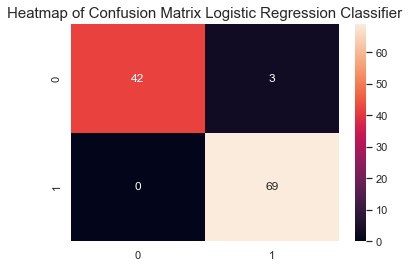

In [60]:
# CONFUSION MATRIX of the Dataframe in LOGISTIC REGRESSION
cm = confusion_matrix(y_test, y_pred_lr_sc)
print(cm)
sns.set()
plt.title('Heatmap of Confusion Matrix Logistic Regression Classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [61]:
# SAVE THE MACHINE LEARNING MODEL

# save model
pickle.dump(lr_classifier, open('breast_cancer_detector.pickle', 'wb'))

#load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

#predict the output
y_pred = breast_cancer_detector_model.predict(X_test_sc)

#confusion matrix
print('Confusion matrix of Logistic Regression: \n', confusion_matrix(y_test, y_pred),'\n')

#accuracy score
print('Accuracy of Logistic Regression = ', accuracy_score(y_test, y_pred))

Confusion matrix of Logistic Regression: 
 [[42  3]
 [ 0 69]] 

Accuracy of Logistic Regression =  0.9736842105263158


In [62]:
input_data=(10.86,21.48,68.51,360.5,0.07431,0.04227,0,0,0.1661,0.05948,0.3163,1.304,2.115,20.67,0.009579,0.01104,0,0,0.03004,0.002228,11.66,24.77,74.08,412.3,0.1001,0.07348,0,0,0.2458,0.06592)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=knn_classifier.predict(input_data_reshaped)

print(int(prediction))

if(prediction[0]==0):
    print("The tumour is Malignant")
else:
    print("The tumour is Benign")

# 0-means Malignant 
# 1- means Benign


1
The tumour is Benign


In [63]:
#  example_for_malignant_data=15.3,25.27,102.4,732.4,0.1082,0.1697,0.1683,0.08751,0.1926,0.0654,0.439,1.012,3.498,43.5,0.005233,0.03057,0.03576,0.01083,0.01768,0.002967,20.27,36.71,149.3,1269,0.1641,0.611,0.6335,0.2024,0.4027,0.09876
# example_for_benign_data=12.87,16.21,82.38,512.2,0.09425,0.06219,0.039,0.01615,0.201,0.05769,0.2345,1.219,1.546,18.24,0.005518,0.02178,0.02589,0.00633,0.02593,0.002157,13.9,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.0578,0.3604,0.07062

#13.4,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.165,0.05701,0.1584,0.6124,1.036,13.22,0.004394,0.0125,0.01451,0.005484,0.01291,0.002074,14.73,21.7,93.76,663.5,0.1213,0.1676,0.1364,0.06987,0.2741,0.07582


